In [7]:
from hnsw import Node, Graph, plot_layer

# Constants

In [8]:
import random
random.seed(421)

num_nodes = 100
layer_coef = 3

import matplotlib.pyplot as plt

# Initialize HNSW Graph

In [9]:

graph = Graph(layer_coef)

# Insert some nodes
for i in range(num_nodes):
    vector = (random.random(), random.random())
    graph.insert(Node(i, vector))


ITS THE ONE


# Show each of the layers

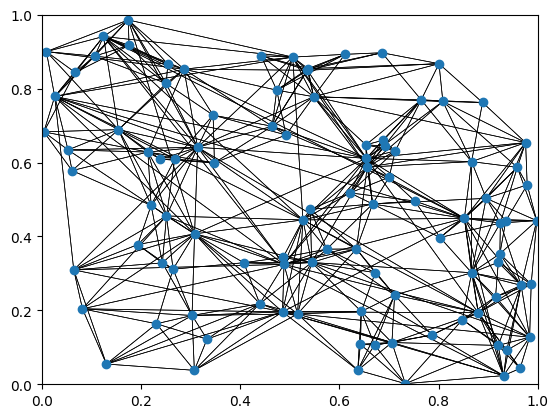

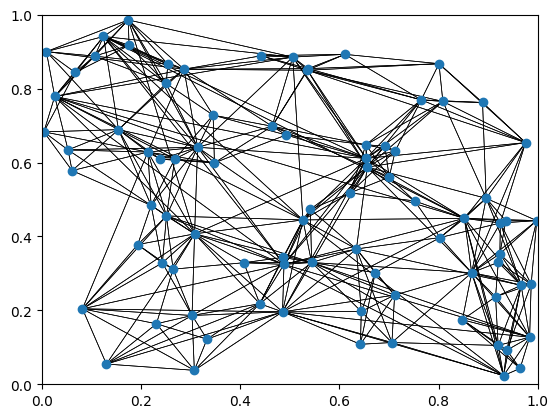

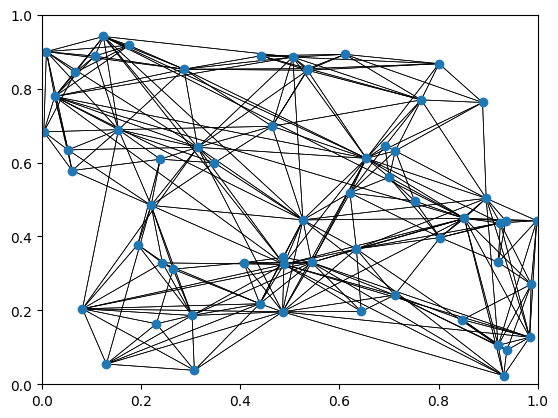

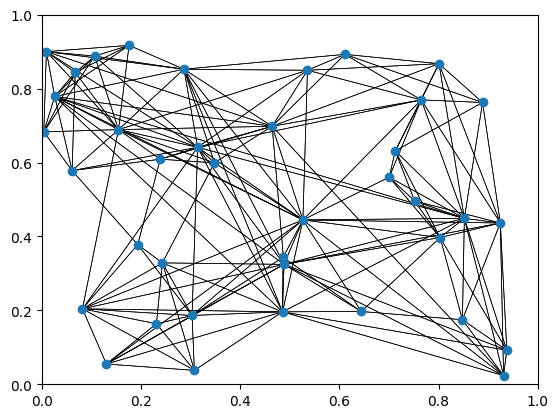

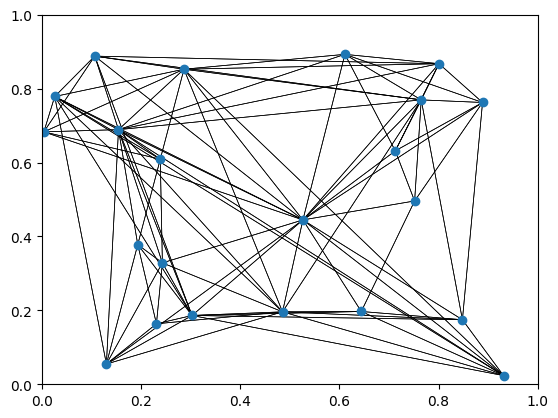

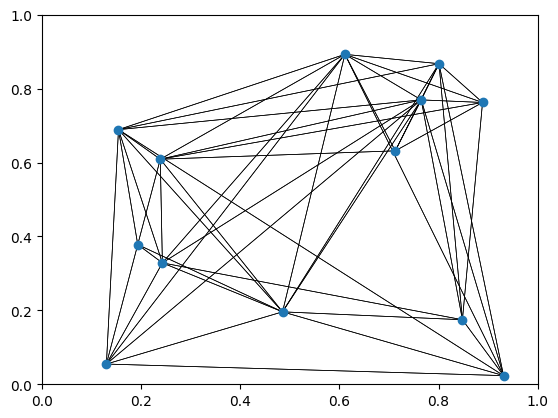

In [10]:

for i in range(6):
    plot_layer(graph, i)
    plt.show()

# plot_layer(graph, 0)


# Plot NN search for HNSW

[(0.5414739621638829, 0.47334382179804113), (0.5414739621638829, 0.47334382179804113), (0.5265792043051974, 0.44469691686447543), (0.6215124598713734, 0.5177967121369952), (0.5746293793880668, 0.365584666592786)]


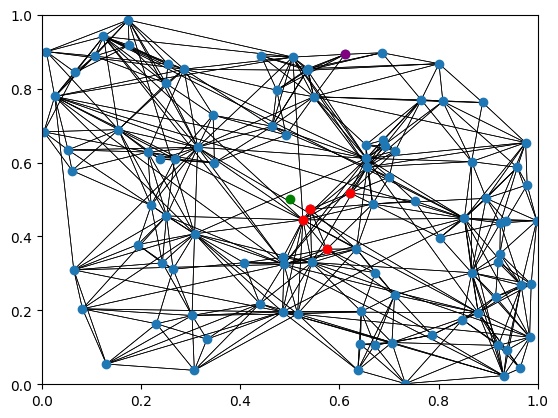

In [11]:

## This is for plotting HNSW
# Find an entry point
max_layer = max(len(x.connections) for x in graph.nodes) - 1
entry = random.choice(graph.get_layer(max_layer))
query = [0.5, 0.5]
result = graph.greedy_search_hnsw(query, entry)
points = [x[1].vector for x in result]
print(points)
plot_layer(graph, 0)
x = [n[0] for n in points]
y = [n[1] for n in points]
plt.scatter(x, y, c="red", zorder=1)
plt.scatter([query[0]], [query[1]], c="green", zorder=1)
plt.scatter([entry.vector[0]], [entry.vector[1]], c="purple", zorder=1)
plt.show()



# Plot NN search for NSW

[(0.5414739621638829, 0.47334382179804113), (0.5265792043051974, 0.44469691686447543), (0.6215124598713734, 0.5177967121369952), (0.5746293793880668, 0.365584666592786), (0.4865251078410787, 0.34333793713007454)]


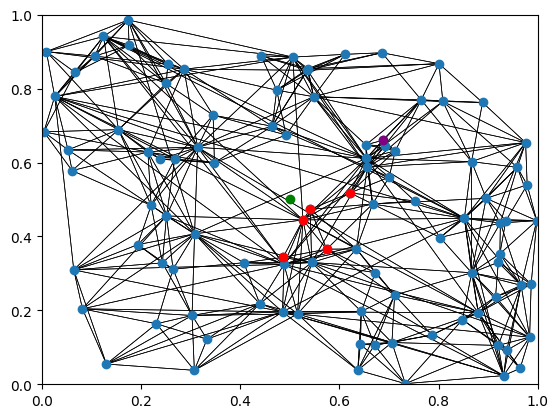

In [12]:

## This is for plotting NSW search
query = [0.5, 0.5]
entry = random.choice(graph.get_layer(0))
result = graph.greedy_search_nsw(query, 0, entry)
points = [x[1].vector for x in result]
print(points)
plot_layer(graph, 0)
x = [n[0] for n in points]
y = [n[1] for n in points]
plt.scatter(x, y, c="red")
plt.scatter([query[0]], [query[1]], c="green")
plt.scatter([entry.vector[0]], [entry.vector[1]], c="purple")
plt.show()